# Assignment 10

Name 1: <br/>
Student id 1: <br/>
Email 1: <br/>


Name 2: <br/>
Student id 2: <br/>
Email 2: <br/> 

**Instructions:** Read each question carefully. <br/>
Make sure you appropriately comment your code wherever required. Your final submission should contain the completed Notebook and the Python file for exercise 1. There is no need to submit the data files. <br/>
Upload the zipped folder in Teams. Make sure to click on "Turn-in" after your upload your submission, otherwise the assignment will not be considered as submitted. Only one from the group should make the submisssion.

---

# Exercise 1: Lesk's Algorithm (6 points)

In this exercise, we will be performing Word Sense Disambiguation using a dictionary-based approach called Lesk's Algorithm (See Chapter 7 Slides 28, 29). The algorithm is given as

$$s_{opt} = \underset{s_k}{\text{argmax}} \space sim\left(D(s_k), \bigcup_{v_j \in C} E(v_j)\right)$$

where \
$s_{opt} = $ optimal sense \
$D(s_k) = $ Dictionary definition of $s_k$ (also called *gloss*)\
$C = $ context of the ambiguous word\
$E(v_j) = $ Dictionary defintion of $v_j$ (obtained from sources like Wikipedia, Oxford dictionary etc.)

We will be implementing the *simplified Lesk Algorithm* which relies on the context word itself to get the similarity with the sense. 

### 1.1 Corpus (0.5 points)
We will be using the Senseval-2 corpus, which consists of text from a mixture of places, including the British National Corpus and the Wall Street Journal section of the Penn Treebank. Each word in the corpus is tagged with its part of speech, and the senses of the following target words are also annotated. You can read about it [here](http://www.nltk.org/howto/corpus.html) (search for 'Senseval'). We will be looking at 2 ambiguous word senses

* hard
* serve

The Senseval corpus assigns the following senses to these two words:

|word|sense|meaning|example|
|---|---|:---:|:---:|
|hard|HARD1|not easy; requiring great physical or mental effort to accomplish or comprehend or endure|"This assignment won't be so hard."|
||HARD2|dispassionate|"You drive a hard bargain."|
||HARD3|resisting weight or pressure|"The rock was hard."|
|serve|SERVE6|provide (usually but not necessarily) food|"The guests were served a warm meal."|
||SERVE10|work for or be a servant to |"How may I serve you?"|
||SERVE2|do duty or hold offices; work in a specific function|"The President served for 2 terms."|
||SERVE12|be sufficient or adequate (in quality or quantity)|"2 gallons of petrol will serve."|

Load the corpus and get the instances of 'hard' and 'serve'. Create your own corpus by extracting the words, their contexts, and their sense. Implement this in the function `create_corpus` in `exercise_1.py`. Also determine the maximum occurring sense in the data, as we will use this in the algorithm.

In [ ]:
from importlib import reload
import exercise_1
exercise_1 = reload(exercise_1)

corpus = exercise_1.create_corpus()

### 1.2 Simplified Lesk's Algorithm (2 points)

The simplified Lesk's algorithm requires the different senses and their definitions for particular words. For getting these, we will use [WordNet](https://www.nltk.org/howto/wordnet.html). The mapping between the Senseval senses and WordNet senses and  for *hard* and *serve* is established in the code cell below.

In [ ]:
mapping = {
    'hard': {
        "HARD1":"difficult.a.01",
        "HARD2":"hard.a.02",
        "HARD3":"hard.a.03"
    },
    'serve':{
        "SERVE6":"serve.v.06",
        "SERVE10":"serve.v.010",
        "SERVE2":"serve.v.02",
        "SERVE12":"suffice.v.01"
    }
}

Understand how to obtain the WordNet senses and their respective definitions for a given word. Now, implement the simplified Lesk's algorithm in the function `sim_lesk` in `exercise_1.py`. You can use the same pseudocode as given [here](https://en.wikipedia.org/wiki/Lesk_algorithm#Simplified_Lesk_algorithm). (2 points)

Use the following metric for computing similarity:

$$sim(X,Y) = \frac{2|X \cap Y|}{|X \cup Y|}$$

To get maximal overlap between the sense definition and contexts, remove the stopwords from the sense definitions using NLTK's list of stopwords.

### 1.3 Testing accuracy on corpus (1 point)

Now, iterate over your corpus for the terms *hard* and *serve*. Obtain the sense of each data item using the Lesk's algorithm, and use the Senseval sense as the ground truth. Determine the accuracy of your predictions against the ground truth and report the scores for both these terms. Implement the loop in the function `run_lesk` and the accuracy score calculation in `get_accuracy` in `exercise_1.py`.

In [ ]:
# TODO
for term in corpus.keys():
    print(f"Term: {term}")
    exercise_1.run_lesk(corpus, term, mapping)
    print("--------------------------------------")

### 1.4 Testing accuracy on NLTK's implementation (0.5 point)

We will try to compare the scores we get to NLTK's implementation of Lesk. Use the condition `nltk=True` in your function `run_lesk` and repeat the same process as **1.3** (0.5 points)

In [ ]:
#TODO
for term in corpus.keys():
    print(f"Term: {term}")
    exercise_1.run_lesk(corpus, term, mapping, nltk=True)
    print("--------------------------------------")

### 1.5 Misc (2 points)

* What are your observations? Why do you think the accuracy scores differ for different words and implementations? (0.5 points)
* What are the possible improvements you can make to your implementation? (0.5 points) \
  *(Hint: Think of the original Lesk algorithm, the structure of WordNet etc.)*
* State 2 advantages and disadvantages of the Lesk's algorithm. (1 point)

# Exercise 2: Expectation Maximization (4 points)

Expectation Maximisation (EM) is an iterative algorithm to find MLE estimates of the latent variables of a statistical model. It does so by performing a sequence of expectation or E-steps and Maximization or M-steps: The E-step defines a function for the expected log-likelihood of the model, and the M-step adapts the model parameters such that they maximize that function. This process is repeated until the log-likelihood of the model converges.

In the lecture you were introduced to EM in the context of word sense disambiguation, but it is also integral part of many NLP applications, of which the most famous are the [statistical machine translation models from IBM](https://en.wikipedia.org/wiki/IBM_alignment_models). They make use of the co-occurence of (e.g.) English and French words in parallel sentences to estimate translation and alignment probabilities. 

This exercise will introduce you to the basic concepts on a theoretical level. 

### 2.1 K-means (2.5 points)

The k-means algorithm is used to partition a dataset $X=\{x_1,x_2,...x_n\}$ into $k \leq n$ clusters such that the variance within the clusters is minimized. This is done by 

1. Choosing the means $\mu^1_1,\mu^1_2,...,\mu^1_k$ of $k$ clusters arbitrarily or by some heuristic
2. Assigning each datapoint $x_i$ to the cluster $C_j$ whose mean $\mu^1_j$ minimizes the euclidean distance $\|x_i-\mu^1_j\|$
3. Recalculating the cluster means as the average value of the datapoints assigned to it:
\begin{equation}
\mu^{t+1}_j = \frac{1}{|C_j|} \sum_{x_i \in C_j} x_i
\end{equation}
With $t$ being the $t^{th}$ step and $t=1$ in this case.
4. Repeating steps 2. & 3. until the cluster assignments do not change anymore.


Now, 
- Explain how this implementation of k-means constitutes a very simple version of the EM algorithm. What corresponds to the E step? What to the M step? (0.5 points)
- Write Python-like pseudocode that applies k-means to a dataset $X=\{x_1,x_2,...x_n\}$ with $x_i \in \mathbb{R}$. (1.5 points) 

  You can have Python syntax highlighting in markdown by writing:
```python
for i in range(100)
    squared = i**2
    print(squared)
```
- This version of k-means is not guaranteed find the optimal solution. Explain why in 2-4 sentences and suggest an alternative version that can find the global optimum. (0.5 points)

### 2.2 Gaussian Mixture models (1.5 points)

A [Gaussian mixture model](https://en.wikipedia.org/wiki/Mixture_model) extends the idea of k-means by assuming that the clusters are not only defined by their mean $\mu_i$, but also by their variance $\sigma^2_i$, i. e. that they follow a normal distribution. You can read this [blog post](https://towardsdatascience.com/gaussian-mixture-models-explained-6986aaf5a95) if you are unsure about how to model the different steps.

- Describe how you would use EM to cluster a dataset $X=\{x_1,x_2,...x_n\}$, $x_i \in \mathbb{R}$ characterized by (unknown) means $\mu_1, \mu_2$ and variances $\sigma^2_1, \sigma^2_2$. In order to do this you *can* build on your pseudocode from 2.1, or make use of the formulae on the slides. (1 point)

- How would your computation change for $x_i \in \mathbb{R}^n$ where $n > 1$? What are $\mu$ and $\sigma^2$ in this case? (0.5 points)

## Bonus (1 point)

There are constraints between different word occurrences that can be leveraged for WSD on top of dictionary based approaches. The [Yarowsky Algorithm](https://en.wikipedia.org/wiki/Yarowsky_algorithm) utilises two such constraints, namely
* One sense per discourse
* One sense per collocation

The formal definition of *discourse* is "*a linguistic unit (such as a conversation or a story) larger than a sentence*", and that of a *collocation* is "*the habitual juxtaposition of a particular word with another word or words with a frequency greater than chance.*"

1. Explain what 'One sense per discourse' and 'One sense per collocation' mean in 1-2 sentences. (0.25 points)

2. The algorithm for disambiguation is given below. Identify the range of line numbers which perform *One sense per discourse* and *One sense per collocation* in the pseudocode. (0.75 points)


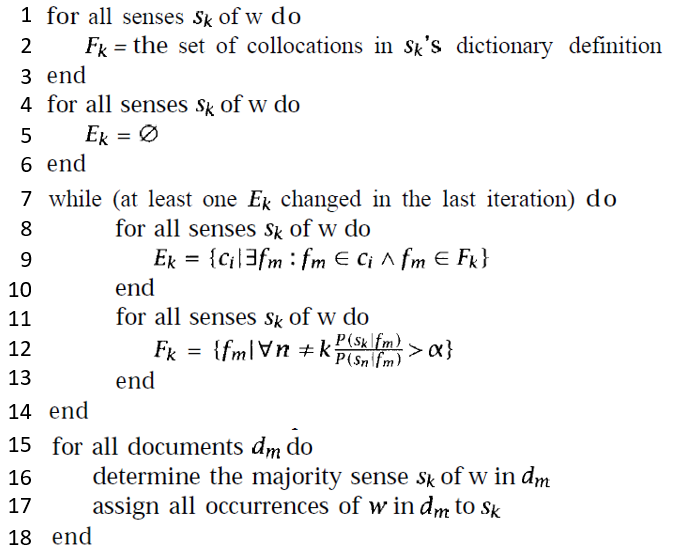

In [ ]:
# Algorithm for sense disambiguation
"""
Fk : characteristic collocations
Ek : set of contexts of ambiguous word w that are assigned to sense sk
"""